In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import rbf

## 1-Batch mode training using least squares - supervised learning of network weights

In [2]:
# Create the input space and corresponding training sets
interval_start, interval_end = 0, 2 * np.pi
step_size = 0.1

X_train = np.arange(interval_start, interval_end, step_size)
y1_train = np.sin(2 * X_train)
y2_train = np.where(np.sin(2 * X_train) >= 0, 1, -1)

# Create the testing sets
test_interval_start = interval_start + 0.05
X_test = np.arange(test_interval_start, interval_end, step_size)
y1_test = np.sin(2 * X_test )
y2_test = np.where(np.sin(2 * X_test) >= 0, 1, -1)



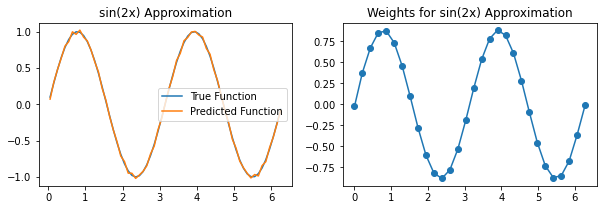

In [3]:
# Number of RBF nodes 
n = 30
# Place RBF nodes evenly spaced in the input space
centers = np.linspace(interval_start, interval_end, n)
# Set a common variance for all nodes
variance = 0.1

network = rbf.RBFNetwork(centers[:, np.newaxis], variance)
network.batch_least_squares(X_train[:, np.newaxis], y1_train[:, np.newaxis])
y1_pred = network.make_prediction(X_test[:, np.newaxis])
network.plot_prediction(X_test, y1_test, y1_pred, title="sin(2x)")

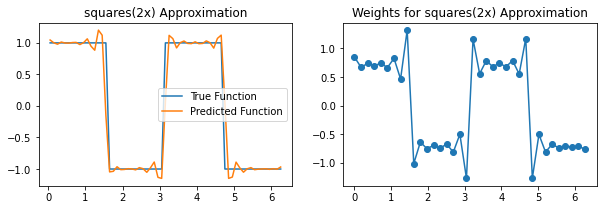

In [4]:
# Number of RBF nodes 
n = 36
# Place RBF nodes evenly spaced in the input space
centers = np.linspace(interval_start, interval_end, n)
# Set a common variance for all nodes
variance = 0.1

network = rbf.RBFNetwork(centers[:, np.newaxis], variance)
network.batch_least_squares(X_train[:, np.newaxis], y2_train[:, np.newaxis])
y2_pred = network.make_prediction(X_test[:, np.newaxis])
network.plot_prediction(X_test, y2_test, y2_pred, title="squares(2x)")

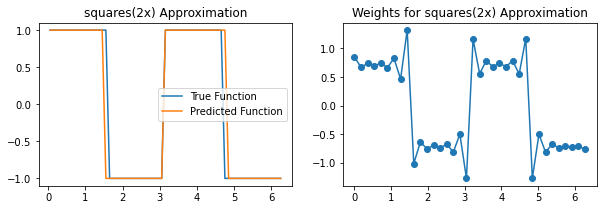

In [5]:
# How can you simply transform the output of your RBF network to reduce the residual error to 0 for the square(2x) problem

# Number of RBF nodes 
n = 36
# Place RBF nodes evenly spaced in the input space
centers = np.linspace(interval_start, interval_end, n)
# Set a common variance for all nodes
variance = 0.1

network = rbf.RBFNetwork(centers[:, np.newaxis], variance)
network.batch_least_squares(X_train[:, np.newaxis], y2_train[:, np.newaxis])
y2_pred = network.make_prediction(X_test[:, np.newaxis])
y2_pred = np.where(y2_pred >= 0, 1, -1)
network.plot_prediction(X_test, y2_test, y2_pred, title="squares(2x)")

Num RBF Units: 5, Error1: 0.6335172214839497, Error2: 0.9647729440820156
Num RBF Units: 10, Error1: 0.4115298777349028, Error2: 0.6318926602904464
Num RBF Units: 15, Error1: 0.27894442531280594, Error2: 0.46110052570969995
Num RBF Units: 20, Error1: 0.1509718669284176, Error2: 0.25929809087453426
Num RBF Units: 25, Error1: 0.05894319754359946, Error2: 0.1909180933035525
Num RBF Units: 30, Error1: 0.01737432502581867, Error2: 0.1047376649291765
Num RBF Units: 35, Error1: 0.004566716621616419, Error2: 0.08953264568707932
Num RBF Units: 40, Error1: 0.0014137706799768129, Error2: 0.09320584589677285
Num RBF Units: 45, Error1: 0.0009755430399576682, Error2: 0.09596182248320069
Num RBF Units: 50, Error1: 0.0008208607461986251, Error2: 0.0968527674284165
Num RBF Units: 55, Error1: 0.0007436321519040661, Error2: 0.09461918062535417
Num RBF Units: 60, Error1: 0.0006757086710010549, Error2: 0.11863672927517295


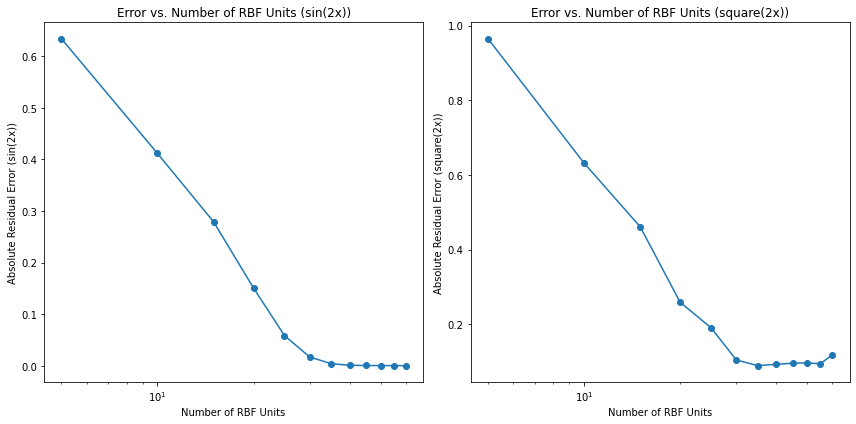

In [8]:
# Vary the number of RBF units
num_rbf_units_range = [k for k in range(5, 65, 5)] 

# Dictionary to store results
results = {'num_rbf_units': [], 'error1': [], 'error2': []}
# Set a common variance for all nodes
variance = 0.1

for num_rbf_units in num_rbf_units_range:
    # Place RBF nodes evenly spaced in the input space
    centers = np.linspace(interval_start, interval_end, num_rbf_units)

    network1 = rbf.RBFNetwork(centers[:, np.newaxis], variance)
    network1.batch_least_squares(X_train[:, np.newaxis], y1_train[:, np.newaxis])
    y1_pred = network1.make_prediction(X_test[:, np.newaxis])
    # Calculate absolute residual errors
    error1 = network.absolute_residual_error(y1_test[:, np.newaxis], y1_pred)

    network2 = rbf.RBFNetwork(centers[:, np.newaxis], variance)
    network2.batch_least_squares(X_train[:, np.newaxis], y2_train[:, np.newaxis])
    y2_pred = network2.make_prediction(X_test[:, np.newaxis])
    # Calculate absolute residual errors
    error2 = network.absolute_residual_error(y2_test[:, np.newaxis], y2_pred)


    # Store results
    results['num_rbf_units'].append(num_rbf_units)
    results['error1'].append(error1)
    results['error2'].append(error2)

# Print and plot the results 
for i in range(len(num_rbf_units_range)):
    print(f"Num RBF Units: {results['num_rbf_units'][i]}, Error1: {results['error1'][i]}, Error2: {results['error2'][i]}")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(results['num_rbf_units'], results['error1'], marker='o')
plt.xscale('log')
plt.xlabel('Number of RBF Units')
plt.ylabel('Absolute Residual Error (sin(2x))')
plt.title('Error vs. Number of RBF Units (sin(2x))')

plt.subplot(1, 2, 2)
plt.plot(results['num_rbf_units'], results['error2'], marker='o')
plt.xscale('log')
plt.xlabel('Number of RBF Units')
plt.ylabel('Absolute Residual Error (square(2x))')
plt.title('Error vs. Number of RBF Units (square(2x))')

plt.tight_layout()
plt.show()

## 2-Regression with noise